In [1]:
#imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from utile import *

In [2]:
data_frame = pd.read_csv('synthetic_fin_df.csv')

In [3]:
data_frame.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
# to comment what this means
data_frame.shape

(6362620, 11)

Check for missing values

In [5]:
# Lets check if dataframe contains any null value.
data_frame.isnull().values.any()

False

<AxesSubplot:>

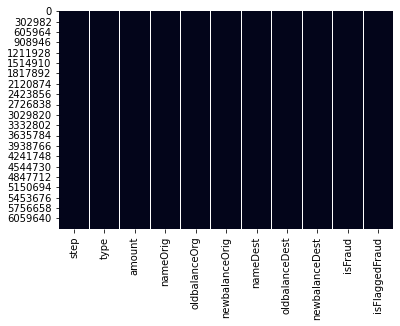

In [6]:
sns.heatmap(data_frame.isnull(), cbar=False)

In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
data_frame.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Comment the above output

In [9]:
data_frame.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

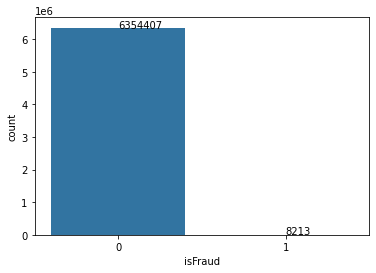

In [10]:
fig,ax = plt.subplots()
sns.countplot(x=data_frame.isFraud,ax=ax)
for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x() + p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height() #y-position
        ax.annotate(val,(x,y))

comment the graph

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

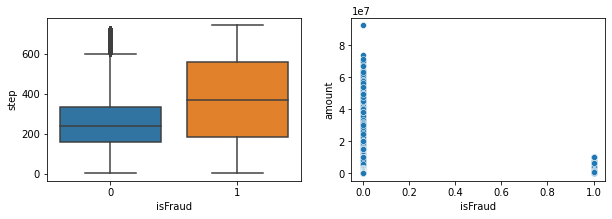

In [11]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
sns.boxplot(x=data_frame.isFraud,y=data_frame.step,ax=ax[0])
sns.scatterplot(x=data_frame.isFraud,y=data_frame.amount,ax=ax[1])

comment graph

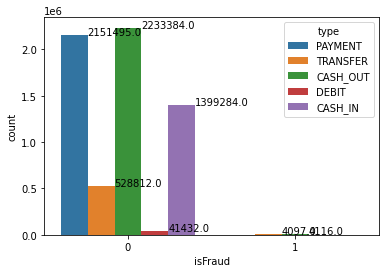

In [12]:
fig,ax = plt.subplots()
sns.countplot(x=data_frame.isFraud,hue=data_frame.type,ax=ax)
for p in ax.patches:
        val = p.get_height() 
        x = p.get_x() + p.get_width()  
        y = p.get_y() + p.get_height() 
        ax.annotate(val,(x,y))

comment the graph

In [13]:
print('Type of payments which are fraudulent are:',list(data_frame.loc[(data_frame.isFraud==1)].type.unique()))


Type of payments which are fraudulent are: ['TRANSFER', 'CASH_OUT']


In [14]:
print('No. of fraudulent transfers which are "Transfer" type are :', len(data_frame.loc[(data_frame.isFraud==1)&(data_frame.type=='TRANSFER')]))
print('No. of fraudulent transfers which are "CASH_OUT" type are :', len(data_frame.loc[(data_frame.isFraud==1)&(data_frame.type=='CASH_OUT')]))

No. of fraudulent transfers which are "Transfer" type are : 4097
No. of fraudulent transfers which are "CASH_OUT" type are : 4116


In [15]:
print("Are there any mismatch in the balance at origin and destination after transaction?")

data_frame['origBalance_inacc'] = (data_frame["oldbalanceOrg"] - data_frame["amount"] != data_frame["newbalanceOrig"]).astype(int)
data_frame['destBalance_inacc'] = (data_frame["oldbalanceDest"] + data_frame["amount"] != data_frame["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:",round(data_frame['origBalance_inacc'].value_counts()[1]/data_frame.shape[0] * 100,2))

print("Balance Error(%) at the destination:",round(data_frame['destBalance_inacc'].value_counts()[1]/data_frame.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 85.09
Balance Error(%) at the destination: 74.45


In [16]:
#dataset = data_frame.loc[(data_frame.type=='TRANSFER')|(data_frame.type=='CASH_OUT')]

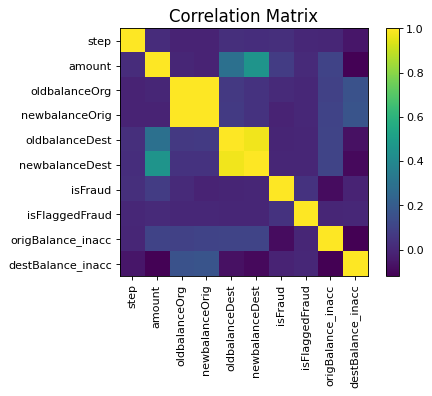

In [17]:
correlationMatrix(data_frame)

Categorical fetures to numerical features therefore dealing with categorical feature issue

In [18]:
type_map = {
    'PAYMENT':'OTHERS',
    'TRANSFER':'TRANSFER',
    'CASH_OUT':'CASH_OUT',
    'DEBIT':'OTHERS',
    'CASH_IN':'OTHERS'
}

In [19]:
data_frame['type'] = data_frame['type'].map(type_map)

data_frame['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

In [20]:
data_frame.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalance_inacc,destBalance_inacc
0,1,OTHERS,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1
1,1,OTHERS,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1
4,1,OTHERS,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1


In [21]:
from sklearn.preprocessing import LabelEncoder
data_frame['type'] = LabelEncoder().fit_transform(data_frame['type'])
data_frame.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalance_inacc,destBalance_inacc
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,1
3,1,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1


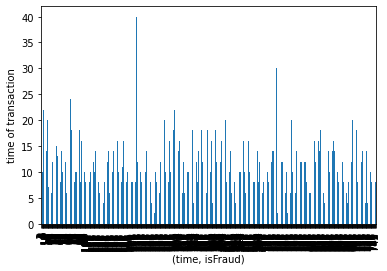

In [22]:
fraud = data_frame['isFraud'].isin([1])

fraud_time = data_frame[fraud].groupby(['step']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.show()

In [23]:
columns = data_frame.columns.tolist()
# Making our independent Features
columns = [var for var in columns if var not in ["isFraud"]]
# Making our Dependent Variable
target = "isFraud"
x = data_frame[columns]
y = data_frame[target]

In [24]:
x.drop(['step', 'newbalanceDest','oldbalanceOrg','nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)
x.head()

c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc
0,1,9839.64,160296.36,0.0,0,1
1,1,1864.28,19384.72,0.0,0,1
2,2,181.00,0.00,0.0,0,1
3,0,181.00,0.00,21182.0,0,1
4,1,11668.14,29885.86,0.0,0,1


In [25]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [26]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1234)

In [28]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [29]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)

In [30]:
X_sm, y_sm = sm.fit_resample(X_train_scaled, y_train)

In [31]:
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [32]:
print('Original dataset shape %s' % Counter(y_test))

Original dataset shape Counter({0: 1906378, 1: 2408})


In [33]:
print('Resampled dataset shape %s' % Counter(y_sm))

Resampled dataset shape Counter({0: 4448029, 1: 4448029})


In [34]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 4448029, 1: 5805})


## Model Development

## Logistic Regression model

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr_model = lr.fit(X_sm, y_sm)

In [36]:
print(lr.score(X_test, y_test))

0.3721391502242787


In [37]:
# y_pred_lr_train = lr_model.predict(X_sm)
# from sklearn.metrics import classification_report

# print("Classification Report:\n\n", classification_report(y_sm, y_pred_lr_train))

In [38]:
y_pred_lr = lr_model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

print("Classification Report:\n\n", classification_report(y_test, y_pred_lr))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.37      0.54   1906378
           1       0.00      0.99      0.00      2408

    accuracy                           0.37   1908786
   macro avg       0.50      0.68      0.27   1908786
weighted avg       1.00      0.37      0.54   1908786



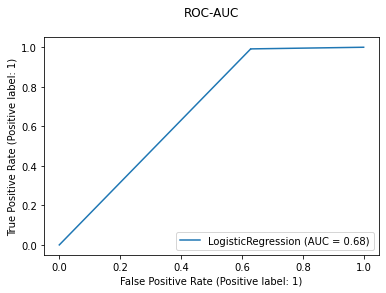

In [40]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


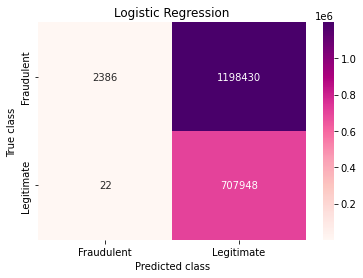

 The result is telling us that we have:  710334 correct predictions
 We have:  1198452 incorrect predictions
 And a total predictions of:  1908786


In [41]:
confusionMatrix(y_pred_lr, y_test, "Logistic Regression")

## XGBOOST Model

In [42]:
# import random

# rows = random.sample(np.arange(0,len(X_train_smote.index)).tolist(), 5000)
# model_params = xgboost_search(X_train_smote.iloc[rows,], y_train_smote.iloc[rows,])

In [43]:
# import xgboost

# m2_xgb = xgboost.XGBClassifier().set_params(**model_params)
import xgboost

m2_xgb = xgboost.XGBClassifier(n_estimators=110, nthread=-1, max_depth = 3, seed=1729)

In [44]:
m2_xgb.fit(X_sm, y_sm)

c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:11:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=110, n_jobs=8, nthread=-1,
              num_parallel_tree=1, predictor='auto', random_state=1729,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1729,
              subsample=1, tree_method='approx', validate_parameters=1,
              verbosity=None)

In [45]:
y_predicted_xgb = m2_xgb.predict(X_test)

In [46]:
print("Classification Report:\n\n", classification_report(y_test, y_predicted_xgb))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.80      0.89   1906378
           1       0.00      0.35      0.00      2408

    accuracy                           0.79   1908786
   macro avg       0.50      0.57      0.44   1908786
weighted avg       1.00      0.79      0.88   1908786



c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


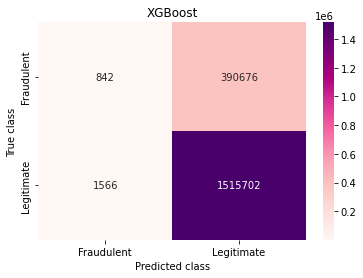

 The result is telling us that we have:  1516544 correct predictions
 We have:  392242 incorrect predictions
 And a total predictions of:  1908786


In [47]:
confusionMatrix(y_predicted_xgb, y_test, "XGBoost")

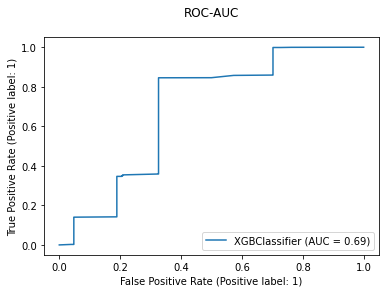

In [48]:
plot_roc_curve(m2_xgb, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

In [52]:
m1_xgb = xgboost.XGBClassifier(n_estimators=110, nthread=-1, max_depth = 3, gamma= 0.5, subsample = 0.5, seed=1729)

In [53]:
m1_xgb.fit(X_sm, y_sm)

c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=110, n_jobs=8, nthread=-1,
              num_parallel_tree=1, predictor='auto', random_state=1729,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1729,
              subsample=0.5, tree_method='approx', validate_parameters=1,
              verbosity=None)

In [54]:
y_predicted_xgb1 = m1_xgb.predict(X_test)

In [55]:
print("Classification Report:\n\n", classification_report(y_test, y_predicted_xgb1))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906378
           1       0.00      0.00      0.00      2408

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


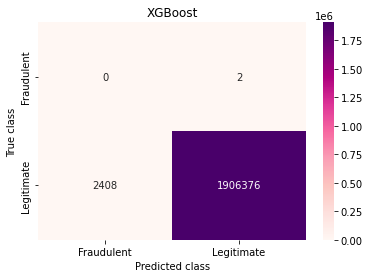

 The result is telling us that we have:  1906376 correct predictions
 We have:  2410 incorrect predictions
 And a total predictions of:  1908786


In [56]:
confusionMatrix(y_predicted_xgb1, y_test, "XGBoost")

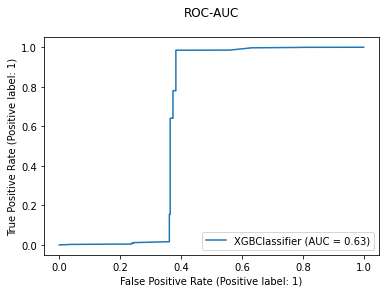

In [57]:
plot_roc_curve(m1_xgb, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

In [49]:
# model.save_model("smote_fraud.xgb")

In [50]:
#Feature scaling
# from sklearn.preprocessing import StandardScaler
# scale=StandardScaler()
# X_train = scale.fit_transform(X_train)
# X_test = scale.transform(X_test)

In [51]:
#from collections import Counter
#from sklearn.datasets import make_classification
#from imblearn.combine import SMOTETomek
#smt = SMOTETomek(sampling_strategy='auto', random_state=None, smote=None, tomek=None, n_jobs=None)
# from imblearn.over_sampling import ADASYN
# ada = ADASYN( sampling_strategy='auto', random_state=None, n_neighbors=5, n_jobs=None)
#from imblearn.under_sampling import TomekLinks
#tom = TomekLinks(sampling_strategy='auto', n_jobs=None)
#X_tom, y_tom = tom.fit_resample(X_train, y_train)
#print('Resampled dataset shape %s' % Counter(y_tom))